# Cyclistic case study
Ali Kakavand
<br>2023-10-17
## Introduction and Scenario
The following study is a project defined within the Google Data Analytics program. Cyclistic is a fictional bike-sharing company in which I am supposed to be working as a junior data analyst. The company has come to this conclusion that its future success is relying on increasing the number of annual membership. I have been tasked with investigationg the historical data to answering this question that how differently annual members and casual riders use cyclistic bikes differently. 
<br>I am going to take all the steps I learned in the program to conduct such an analysis. 
## Phase 1: Ask
Although my department has been tasked with providing new marketing strategies to address the challenge of converting casual riders to members, my particular responsibility to analyze this data to figure out how annual members and casual riders are using the bikes differently. The outcome of my analysis will help the department to target their users effectively. 
## Phase 2: Prepare
### 2.1. Source
The data required for the analysis has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement). The data itself can be downloaded from [here](https://divvy-tripdata.s3.amazonaws.com/index.html). Although the data is available for the last 8 years, I used the data associated with 2022. I firstly downloaded all the 12 months of data, then copied them to the working directory. These files have more that 5.6 million records collectively. Each record consists of an ID generated for each ride, the type of bike being used, data and time of ride start and end, name and ID of each starting and ending station, as well as their latitude and langitude, and finally the user type. Sensitive data associated to the users has been already removed from the datasets.
### 2.2. ROCCC?
**Reliable**: This data is publically available. So for the purpose of this study, it can be thought as a reliable data.
<br>**Original**: This data collected by a first party, namely Cyclistic. Therefore, it is original.
<br>**Current**: As I explained, these datasets are obtained in 2022. So yes it is current.
<br>**Comprehensive**: For the purpose of the task in hand, it has enough information so that we would be able to answer the main question.
<br>**Cited**: This data has been licensed by Motivate Inc.

It is clear that the dataset has satisfied all the criteria of ROCCC. Let's get started.
## Phase 3: Process
### 3.1. Tools
Since we are dealing with more than of 1GB worth of data, spreadsheets can not be a good option. Obviously a database querying tool is required. I am using BigQuery for performing SQL queries. However, the sandbox version of BigQuery, which is the one I have, has some limitations which made my analysis hard. That is why I decided to go with programming languages. I prefered Python which is enjoying from a variety of libraries and functions for doing almsot anything, including data analysis. Moreover, it offers a powerful markdown notebook for documenting and sharing the analysis and its results. 

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

%matplotlib inline

### 3.2. Importing the datasets for each month

In [2]:
# importing the datasets (2022)

tripdata_raw01 = pd.read_csv('C:/Users/a7kak/202201-divvy-tripdata.csv')
tripdata_raw02 = pd.read_csv('C:/Users/a7kak/202202-divvy-tripdata.csv')
tripdata_raw03 = pd.read_csv('C:/Users/a7kak/202203-divvy-tripdata.csv')
tripdata_raw04 = pd.read_csv('C:/Users/a7kak/202204-divvy-tripdata.csv')
tripdata_raw05 = pd.read_csv('C:/Users/a7kak/202205-divvy-tripdata.csv')
tripdata_raw06 = pd.read_csv('C:/Users/a7kak/202206-divvy-tripdata.csv')
tripdata_raw07 = pd.read_csv('C:/Users/a7kak/202207-divvy-tripdata.csv')
tripdata_raw08 = pd.read_csv('C:/Users/a7kak/202208-divvy-tripdata.csv')
tripdata_raw09 = pd.read_csv('C:/Users/a7kak/202209-divvy-tripdata.csv')
tripdata_raw10 = pd.read_csv('C:/Users/a7kak/202210-divvy-tripdata.csv')
tripdata_raw11 = pd.read_csv('C:/Users/a7kak/202211-divvy-tripdata.csv')
tripdata_raw12 = pd.read_csv('C:/Users/a7kak/202212-divvy-tripdata.csv')

### 3.3. Merging the data to creat one large dataset

In [3]:
# merging all data

tripdata = pd.concat([tripdata_raw01, tripdata_raw02, tripdata_raw03, tripdata_raw04, 
                      tripdata_raw05, tripdata_raw06, tripdata_raw07, tripdata_raw08, 
                      tripdata_raw09, tripdata_raw10, tripdata_raw11, tripdata_raw12], ignore_index=True)

### 3.4. Inspecting the data

In [4]:
tripdata.shape

(5667717, 13)

In [5]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [6]:
# to ensure that important columns have the right numbers of values (categories), e.g. 'rideable_type' and 'member_casual'

tripdata.nunique(dropna=True)

ride_id               5667717
rideable_type               3
started_at            4745862
ended_at              4758633
start_station_name       1674
start_station_id         1313
end_station_name         1692
end_station_id           1317
start_lat              668346
start_lng              631047
end_lat                  1606
end_lng                  1590
member_casual               2
dtype: int64

In [7]:
# counting the number of each value in a column, also ensuring there is no other value in important columns except except
# expected

tripdata['member_casual'].value_counts()

member_casual
member    3345685
casual    2322032
Name: count, dtype: int64

In [8]:
tripdata['rideable_type'].value_counts()

rideable_type
electric_bike    2889029
classic_bike     2601214
docked_bike       177474
Name: count, dtype: int64

In [9]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


At this step, I make a backup of the one single dataset that I created.

In [10]:
# backup (bc: before cleaning)

# tripdata.to_csv('2022-divvy-tripdata-backup-bc.csv')

### 3.5. Data cleaning
Inspecting the data shows us that we must do at least two things here. One is to extract the month and the day parts of the ride date. Two is to calculate the ride length for each ride. Having these two manipulations done, it would be much easier to search for trends and patterns. But before that, we can get rid of those information which are seemingly irrelevant to our analysis. 

In [11]:
# dropping those columns specifying the geographic locations of stations. For the purpose of the current study, they are
# irrelevant

tripdata.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)

To be able to manipulate the data, the dtype of ride date and time must be changed from string to datetime. 

In [12]:
# changing the dtype of columns 'started_at' and 'ended_at' from str to datetime

tripdata['started_at'] = pd.to_datetime(tripdata['started_at'])
tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'])

In [13]:
tripdata.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
member_casual                 object
dtype: object

In [14]:
# creating a new column containing the ride length

tripdata['ride_length'] = tripdata['ended_at'] - tripdata['started_at']

In [15]:
tripdata.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
member_casual                  object
ride_length           timedelta64[ns]
dtype: object

In [16]:
tripdata['ride_length'].sort_values(ascending=False)

4994493    28 days 17:47:15
1464697    25 days 04:17:48
2119596    24 days 21:00:38
286843     23 days 20:34:04
2905537    23 days 18:08:49
                 ...       
1810805   -1 days +21:50:55
1635637   -1 days +21:49:58
2095200   -1 days +21:42:35
4743742   -1 days +21:11:18
4305947   -8 days +19:26:39
Name: ride_length, Length: 5667717, dtype: timedelta64[ns]

As can be seen, there are some rows that have negative or zero values. That means the starting time of some rides are ahead 
of their ending time which does not make sense. It is likely that this is a problem of data entry. We must get rid of these
rows because there is no way for us to find out about the right data to be entered. However, in real world, this is a matter that needs to be discussed with the team.

In [17]:
# First, let us check how many negative and zero timedelta values we have. Turns out that there are 531 of them

tripdata_negative_length = tripdata[tripdata['ride_length'] <= pd.Timedelta(0)]
tripdata_negative_length['ride_length'].count()

531

In [18]:
# Now, it is time to remove all those negative and zero timedelta values

tripdata = tripdata[tripdata['ride_length'] > pd.Timedelta(0)]

In [19]:
tripdata['ride_length'].sort_values(ascending=False)

4994493   28 days 17:47:15
1464697   25 days 04:17:48
2119596   24 days 21:00:38
286843    23 days 20:34:04
2905537   23 days 18:08:49
                ...       
3584766    0 days 00:00:01
1441852    0 days 00:00:01
3553033    0 days 00:00:01
1455804    0 days 00:00:01
800305     0 days 00:00:01
Name: ride_length, Length: 5667186, dtype: timedelta64[ns]

It is noteworthy that there are still some weird records that indicate some rides taken place in order of seconds. In real world, they must be verified because they may be wrong and would influence the results. For the purpose of this study, I assumed they are correct. 

Now, I will extract the month and day parts of the ride date.

In [20]:
# Now, let us extract the month and the day of each ride. Year of the ride seems to be irrelevant to our analysis

tripdata['month'] = tripdata['started_at'].dt.month
tripdata['day'] = tripdata['started_at'].dt.day

In [21]:
# Converting the "month" and "day" from numbers to words

tripdata['month'] = tripdata['started_at'].dt.strftime('%b')
tripdata['day'] = tripdata['started_at'].dt.strftime('%a')

In [22]:
tripdata.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
member_casual                  object
ride_length           timedelta64[ns]
month                          object
day                            object
dtype: object

In [23]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,month,day
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,0 days 00:02:57,Jan,Thu
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,0 days 00:04:21,Jan,Mon
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,0 days 00:04:21,Jan,Tue
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,0 days 00:14:56,Jan,Tue
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,0 days 00:06:02,Jan,Thu


In [24]:
# Making sure about the days and months

# tripdata['month'].nunique()
# tripdata['month'].unique()
# tripdata['day'].nunique()
# tripdata['day'].unique()

In [25]:
# Sorting all the records based on the date and time of the ride start

tripdata.sort_values(by=['started_at'], inplace=True)

In [26]:
tripdata['started_at']

73479     2022-01-01 00:00:05
68510     2022-01-01 00:01:00
64490     2022-01-01 00:01:16
73485     2022-01-01 00:02:14
73478     2022-01-01 00:02:35
                  ...        
5490051   2022-12-31 23:57:18
5652875   2022-12-31 23:58:01
5634763   2022-12-31 23:58:41
5634907   2022-12-31 23:59:01
5582591   2022-12-31 23:59:26
Name: started_at, Length: 5667186, dtype: datetime64[ns]

In [27]:
# Finding missing values

tripdata.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833038
start_station_id      833038
end_station_name      892536
end_station_id        892536
member_casual              0
ride_length                0
month                      0
day                        0
dtype: int64

In [28]:
null_rows = tripdata[tripdata['start_station_name'].isnull() & tripdata['end_station_name'].isnull()]
null_rows['ride_id'].count()

427440

In my analysis, I am going to work with the date and time as well as the user and the bike type related to each ride. Therefore, those missing values, which all are located in other columns, can not do any harm. This has this advantage that we would still run our analysis on the whole dataset, instead of around 77% of it. (Because around 23% of the rows include those null values)
<br>(833038-427440) + 427440 + (892536-427440) / 5617186 ~ 23%

In [29]:
# Converting the 'ride_length' column from timedelta64 dtype to a number (e.g. in form of minutes and hours)

tripdata['ride_length_min'] = tripdata['ride_length'].dt.total_seconds() / 60
tripdata['ride_length_hr'] = tripdata['ride_length'].dt.total_seconds() / 3600

In [30]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,month,day,ride_length_min,ride_length_hr
73479,98D355D9A9852BE9,classic_bike,2022-01-01 00:00:05,2022-01-01 00:01:48,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,casual,0 days 00:01:43,Jan,Sat,1.716667,0.028611
68510,04706CA7F5BD25EE,electric_bike,2022-01-01 00:01:00,2022-01-01 00:04:39,Broadway & Waveland Ave,13325,Broadway & Barry Ave,13137,casual,0 days 00:03:39,Jan,Sat,3.650000,0.060833
64490,42178E850B92597A,electric_bike,2022-01-01 00:01:16,2022-01-01 00:32:14,Clark St & Ida B Wells Dr,TA1305000009,Clark St & Ida B Wells Dr,TA1305000009,casual,0 days 00:30:58,Jan,Sat,30.966667,0.516111
73485,6B93C46E8F5B114C,classic_bike,2022-01-01 00:02:14,2022-01-01 00:31:07,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,casual,0 days 00:28:53,Jan,Sat,28.883333,0.481389
73478,466943353EAC8022,classic_bike,2022-01-01 00:02:35,2022-01-01 00:31:04,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,casual,0 days 00:28:29,Jan,Sat,28.483333,0.474722


In [31]:
# I think the data processing is almost done. We can go ahead and do the analysis. Before that, I make another backup
# after the cleaning step (ac: after cleaning)

# tripdata.to_csv('2022-divvy-tripdata-backup-ac.csv')

## Phase 4: Analyze
### 4.1. Analyzing and sharing


In [32]:
# Getting some aggregated information about each member categories

tripdata.groupby('member_casual').ride_length_min.agg(['count', 'min', 'max', 'mean', 'median', 'sum'])

,count,min,max,mean,median,sum
member_casual,,,,,,
casual,2321769,0.016667,41387.25,29.148333,13.000000,6.767570e+07
member,3345417,0.016667,1559.90,12.714858,8.833333,4.253650e+07


First glance reveals that:
<br>a) Ride counts done by members is higher than that of casual riders.
<br>b) The length of ride done by members is shorter than that of casual riders.
<br>c) There are some records showing very long rides in order of days. These can be seen as outliers. The difference between median and mean also confirm this. However, I keep those outliers and do the analysis anyway.

Text(0.5, 1.0, 'Member vs. Casual trips (counts and duration)')

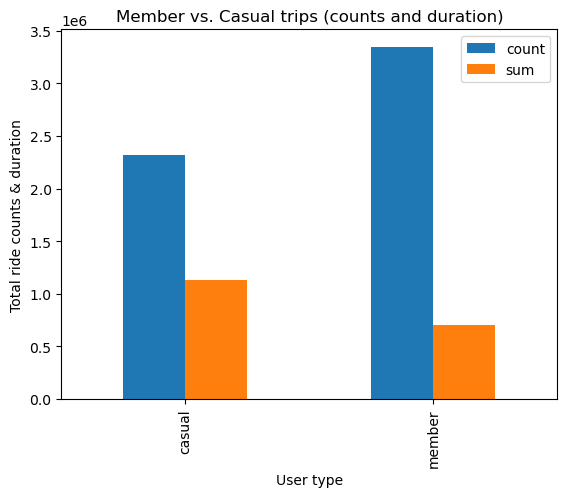

In [33]:
# Visualizing total ride counts and ride length of two user types: members and casuals riders. Despite the fact that
# these two have different units, visualizing them in one graph will only demonstrate how different they are.

tripdata.groupby('member_casual').ride_length_hr.agg(['count', 'sum']).plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('User type')
plt.ylabel('Total ride counts & duration')
plt.title('Member vs. Casual trips (counts and duration)')

In [34]:
# distribution of the rides done by users on weekdays

tripdata.groupby(['day']).member_casual.agg(['value_counts'])

value_counts
day member_casual              
Fri member               467051
    casual               334667
Mon member               473305
    casual               277649
Sat casual               473130
    member               443246
Sun casual               388981
    member               387180
Thu member               532215
    casual               309297
Tue member               518584
    casual               263706
Wed member               523836
    casual               274339

In [35]:
# Reorder the weekdays, typecast the 'day' column to a categorical one

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
tripdata['day'] = pd.Categorical(tripdata['day'], categories=weekdays, ordered=True)

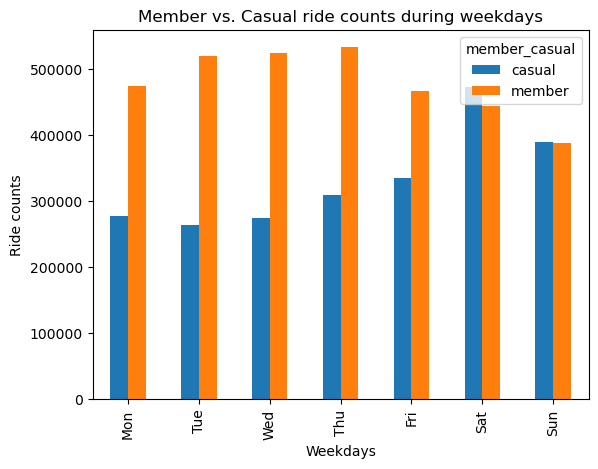

In [36]:
# Create the grouped bar plot with stacked=False to show two bars side by side for each day
tripdata.groupby(['day', 'member_casual']).size().unstack().plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('Weekdays')
plt.ylabel('Ride counts')
plt.title('Member vs. Casual ride counts during weekdays')

# Show the plot
plt.show()

This graph depicts this fact that members take the rides way more often than the casuals during weekdays and they do it in an almost steady rate with some minor fluctuations. This goes down on weekends. On the other hand, the number of rides done by casuals peak on weekends while they are way lower than members rides during weekdays.
<br>Now, it could be helpful if we have a look at how long members and casuals use cyclistic bikes on average during a week.

<br>**Important Note:** As explained before, there seems to be outliers in the data. I did not remove them, however, I will consider the median for my analysis to be on the safe side. Those outliers would potentially skew the whole result.  

In [37]:
tripdata.groupby(['day', 'member_casual']).ride_length_min.agg(['median'])

median
day member_casual           
Mon casual         12.866667
    member          8.450000
Tue casual         11.533333
    member          8.483333
Wed casual         11.433333
    member          8.583333
Thu casual         11.750000
    member          8.666667
Fri casual         12.466667
    member          8.716667
Sat casual         14.966667
    member          9.800000
Sun casual         15.016667
    member          9.550000

Text(0.5, 1.0, 'Member vs. Casual trips duration during weekdays')

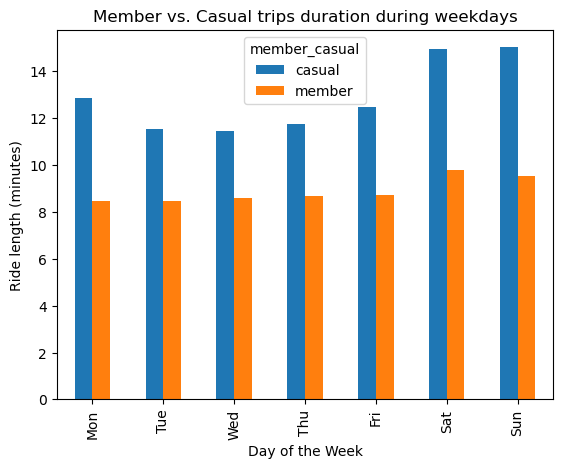

In [38]:
# Create the grouped bar plot with stacked=False to show two bars side by side for each day
tripdata.groupby(['day', 'member_casual']).ride_length_min.median().unstack().plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Ride length (minutes)')
plt.title('Member vs. Casual trips duration during weekdays')

The upper graph shows that members use the bikes at a relatively constant rate on average during the weekdays, and only in weekends that the trend experiences a slight increase. This confirms the idea that members are mostly using the bikes to commute to work. 
<br>For casual riders, it is different a bit. It is true that the number of time they use the bikes is lower than members, but they use them longer! The trend experiences the longest rides for casuals at weekends, as expected.
<br>Now, we will have a look at the trends over the months; from January to December of 2022.

In [39]:
# Reorder the months, typecast the 'month' column to a categorical one

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
tripdata['month'] = pd.Categorical(tripdata['month'], categories=month_order, ordered=True)

In [40]:
tripdata.groupby(['month']).member_casual.agg(['value_counts'])

value_counts
month member_casual              
Jan   member                85248
      casual                18517
Feb   member                94190
      casual                21414
Mar   member               194150
      casual                89874
Apr   member               244820
      casual               126398
May   member               354423
      casual               280387
Jun   member               400116
      casual               369022
Jul   member               417403
      casual               406013
Aug   member               426969
      casual               358886
Sep   member               404603
      casual               296664
Oct   member               349659
      casual               208961
Nov   member               236935
      casual               100742
Dec   member               136901
      casual                44891

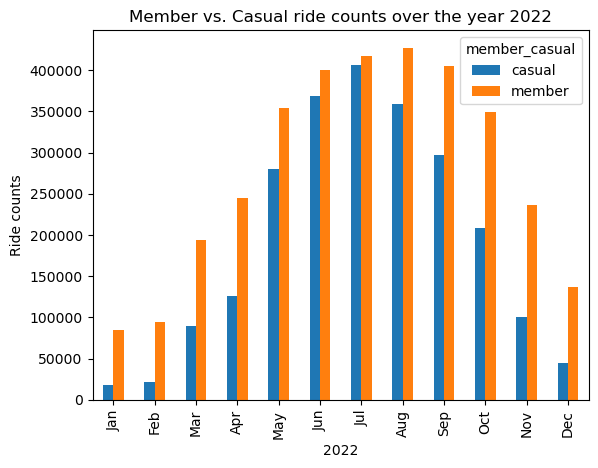

In [41]:
# Create the grouped bar plot with stacked=False to show two bars side by side for each day
tripdata.groupby(['month', 'member_casual']).size().unstack().plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('2022')
plt.ylabel('Ride counts')
plt.title('Member vs. Casual ride counts over the year 2022')

# Show the plot
plt.show()

This graph is showing the same pattern we saw earlier in the analyis we conducted on weekly basis. Casual riders use the bikes less than the members in terms of the number of time they use the service. The distance between the members and casuals are much higher in Fall and Winter and it is reduced in hot seasons. For both members and casual riders, there is this increasing trend from Winter towards the Summer and then downfalling towards end of the year. 

In [42]:
tripdata.groupby(['month', 'member_casual']).ride_length_min.agg(['median'])

median
month member_casual           
Jan   casual         10.133333
      member          7.483333
Feb   casual         10.900000
      member          7.516667
Mar   casual         14.216667
      member          8.033333
Apr   casual         13.833333
      member          7.883333
May   casual         15.283333
      member          9.383333
Jun   casual         14.350000
      member         10.033333
Jul   casual         14.033333
      member          9.900000
Aug   casual         12.966667
      member          9.600000
Sep   casual         12.033333
      member          9.100000
Oct   casual         10.800000
      member          8.100000
Nov   casual          9.216667
      member          7.633333
Dec   casual          8.133333
      member          7.250000

Text(0.5, 1.0, 'Member vs. Casual trips duration over the year')

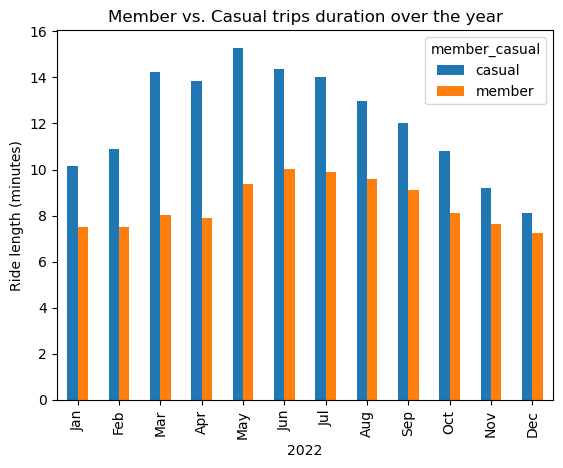

In [43]:
# Create the grouped bar plot with stacked=False to show two bars side by side for each day
tripdata.groupby(['month', 'member_casual']).ride_length_min.median().unstack().plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('2022')
plt.ylabel('Ride length (minutes)')
plt.title('Member vs. Casual trips duration over the year')

Going through the details of the previous graph reveals that although casual riders do not use the bikes that often compared to members, they use the bikes much longer than members. Also, casual riders bike usage peak at Spring while members experience their longest rides in Summer. Nevertheless, both of them have an increasing trend at first and then decreasing one towards the end of the year.

Now, we go through how differently members and casual riders use Cyclistic offered bike types. 

In [44]:
# Summary of casual and member rides counts by bike type

tripdata.groupby(['member_casual', 'rideable_type']).size()

member_casual  rideable_type
casual         classic_bike      891406
               docked_bike       177468
               electric_bike    1252895
member         classic_bike     1709682
               electric_bike    1635735
dtype: int64

Or,

In [45]:
tripdata.groupby(['member_casual']).rideable_type.agg(['value_counts'])

value_counts
member_casual rideable_type              
casual        electric_bike       1252895
              classic_bike         891406
              docked_bike          177468
member        classic_bike        1709682
              electric_bike       1635735

Text(0.5, 1.0, 'Member vs. Casual trips counts using different bike types (2022)')

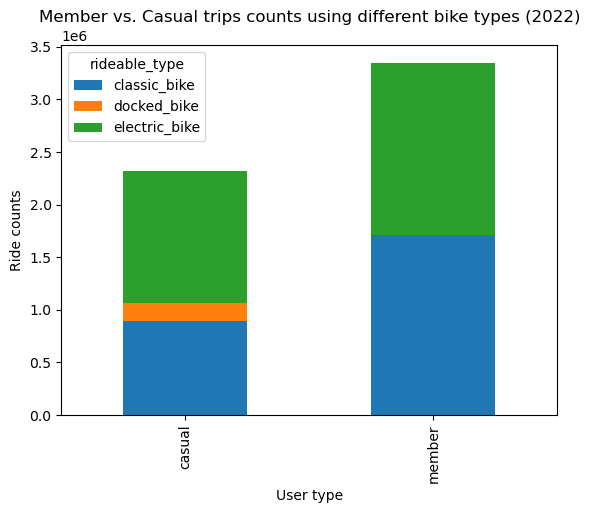

In [46]:
tripdata.groupby(['member_casual', 'rideable_type']).size().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('User type')
plt.ylabel('Ride counts')
plt.title('Member vs. Casual trips counts using different bike types (2022)')

This graph tells us that electric bikes are more preferable by casual riders than classic bikes. The next preference for casuals is classic bikes. Casuals also use docked bikes while members do not at all. 

In [47]:
tripdata.groupby(['member_casual', 'rideable_type'])['ride_length_min'].median()

member_casual  rideable_type
casual         classic_bike     14.566667
               docked_bike      28.050000
               electric_bike    10.933333
member         classic_bike      9.400000
               electric_bike     8.300000
Name: ride_length_min, dtype: float64

In [48]:
tripdata.groupby(['member_casual', 'rideable_type'])['ride_length_min'].median().unstack()

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,14.566667,28.05,10.933333
member,9.400000,NaN,8.300000


Text(0.5, 1.0, 'Member vs. Casual trips duration using different bike types (2022)')

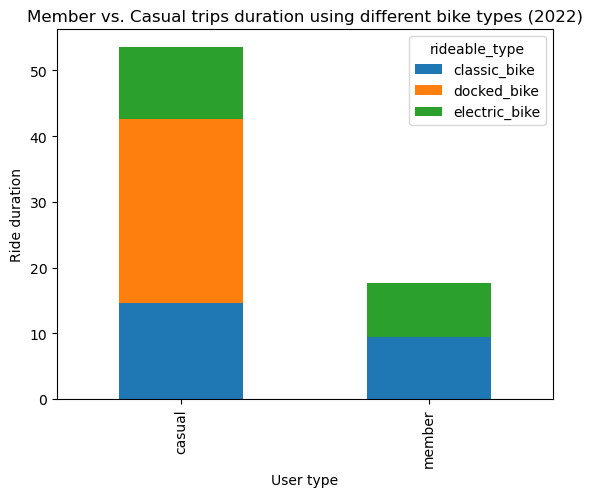

In [49]:
tripdata.groupby(['member_casual', 'rideable_type'])['ride_length_min'].median().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('User type')
plt.ylabel('Ride duration')
plt.title('Member vs. Casual trips duration using different bike types (2022)')

This graph tells us that casual riders are using the electric bikes a bit shorter than classic ones. Probably the reason behind that is related to the batteries and their charging capacities. However, the most interesting thing about this graph is the extensive usage of docked bikes by casual riders. They simply have the longest usage which should be considered by the marketing campaign. On the other side, we see the members who are using the classic and electric bikes equally. This reinforces this hypothesis that members are using the bikes mostly for commuting.  

Text(0.5, 1.0, 'Member vs. Casual trips duration using different bike types (2022)')

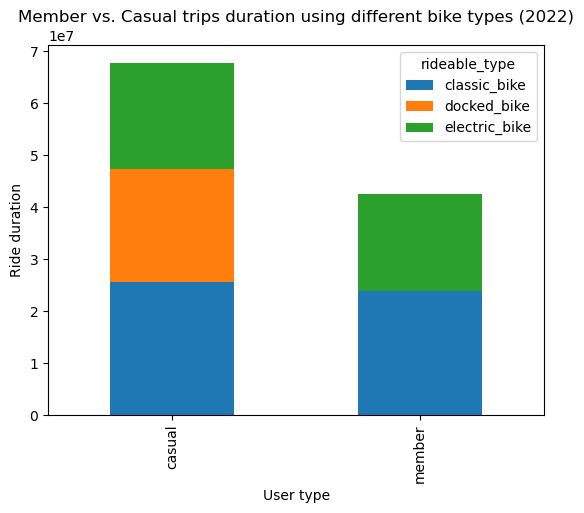

In [50]:
tripdata.groupby(['member_casual', 'rideable_type'])['ride_length_min'].sum().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('User type')
plt.ylabel('Ride duration')
plt.title('Member vs. Casual trips duration using different bike types (2022)')

**Note:** This graph is exactly like the one before it, except that I used mean() instead of median(). It is noteworthy how different they are and how easy they can result in misunderstandings. It is obvious that the outliers we talked about earlier must be discussed with the team and the manager.

In the following, I would like to seek anything worthy about how members and casuals use different types of bike during the week and throught the year.

In [51]:
classic_bike = tripdata[tripdata['rideable_type'] == 'classic_bike']
electric_bike = tripdata[tripdata['rideable_type'] == 'electric_bike']

Text(0.5, 1.0, 'Member vs. Casual trips duration over the year (2022) by classic bikes')

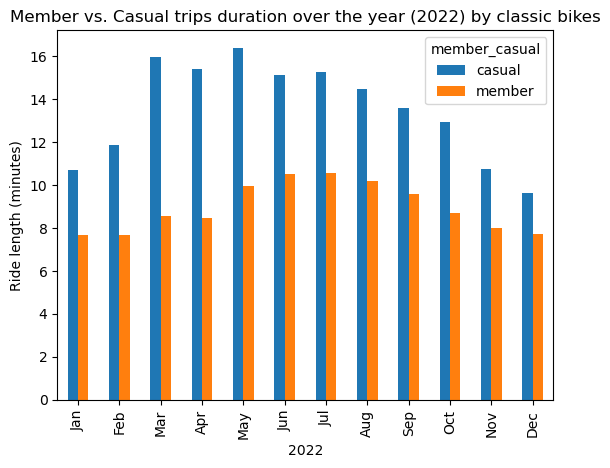

In [52]:
# Create the grouped bar plot with stacked=False to show two bars side by side for each day
classic_bike.groupby(['month', 'member_casual'])['ride_length_min'].median().unstack().plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('2022')
plt.ylabel('Ride length (minutes)')
plt.title('Member vs. Casual trips duration over the year (2022) by classic bikes')

Text(0.5, 1.0, 'Member vs. Casual trips duration over the year (2022) by electric bikes')

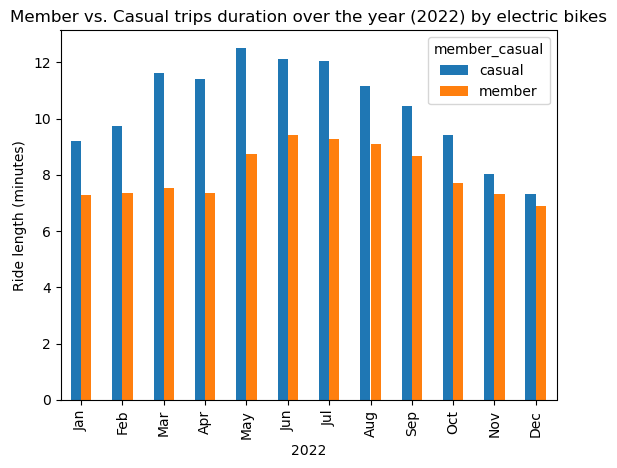

In [53]:
# Create the grouped bar plot with stacked=False to show two bars side by side for each day
electric_bike.groupby(['month', 'member_casual'])['ride_length_min'].median().unstack().plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('2022')
plt.ylabel('Ride length (minutes)')
plt.title('Member vs. Casual trips duration over the year (2022) by electric bikes')

Text(0.5, 1.0, 'Member vs. Casual trips duration during the week (2022) by classic bikes')

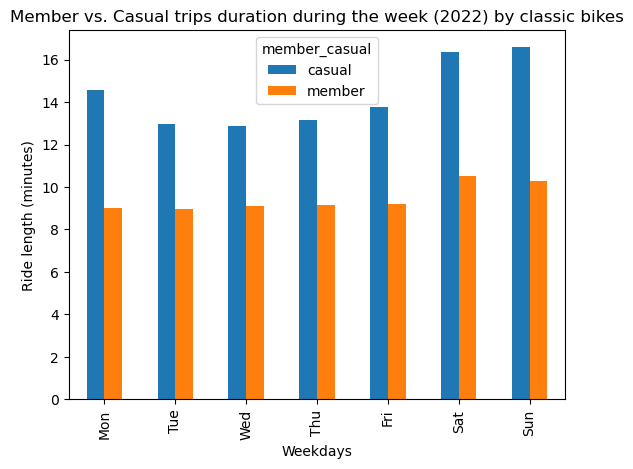

In [54]:
# Create the grouped bar plot with stacked=False to show two bars side by side for each day
classic_bike.groupby(['day', 'member_casual'])['ride_length_min'].median().unstack().plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('Weekdays')
plt.ylabel('Ride length (minutes)')
plt.title('Member vs. Casual trips duration during the week (2022) by classic bikes')

Text(0.5, 1.0, 'Member vs. Casual trips duration during the week (2022) by electric bikes')

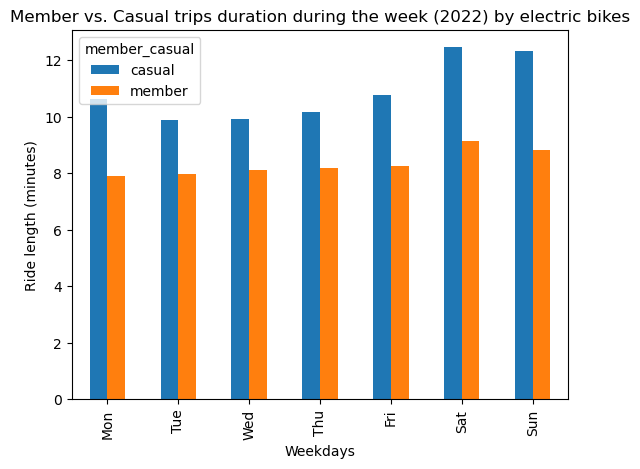

In [55]:
# Create the grouped bar plot with stacked=False to show two bars side by side for each day
electric_bike.groupby(['day', 'member_casual'])['ride_length_min'].median().unstack().plot(kind='bar', stacked=False)

# Set plot labels and title
plt.xlabel('Weekdays')
plt.ylabel('Ride length (minutes)')
plt.title('Member vs. Casual trips duration during the week (2022) by electric bikes')

The last four graphs show the trends as expected. 

### 4.2. Interpreting

I have already explained what can be gained from analyzing the data. In this section I will brief them:

1- The number of rides done by casuals drastically increase in Summer. Their usage in cold seasons is far too low caompared to hot seasons.

2- During a week, casuals and members show an opposite behaviour. The number of rides members take will drop on weekends; but the number of rides casual riders take increase on weekends. So, any marketing campaign must focus on encouraging casuals to use the bikes on weekdays as well.

3- Casuals take longer rides on average. The difference roots from their purpose of using the bikes. One explanation is that the casuals might be using the bikes for excursions. Members however tend to use the bikes as fast as they can. This is probably caused by this fact that they use the bikes for commuting to work or university.

4- Regarding bike type, it must be noted that casuals use electric bikes more than other types. They also use the docked bikes as their last choice, however, they use them much longer than the others, on average. It must be noted that although, casuals use the electric bikes more often, the ride length of electrics is lower than classics, on average. This is probably caused by batteries they use. This should be investigated further. Mebers, on the other hand, prefer using classic and electric bikes at almost a same rate. They never used docked bikes in 2022.  

## Suggestions

1- The marketing campaign for converting casual riders to members should focus on the methods to convince the casuals to use the bikes in weekdays too, also they should think about encouraging them to use the bikes on cold seasons as well. 

2- Electric bikes are preferable by most casuals. The campaign should consider take that into consideration. And although they tend to use docked bikes not that often, they use them much longer than other bikes.

3- For taking the analysis to deeper level, I think the time of the day at which the rides are taken can possibly give us some interesting insights.

## Last word
I want to use this moment to thank you guys for reading this, also Google for providing such a great program, [Google Data Analytics program at Coursera](https://www.coursera.org/professional-certificates/google-data-analytics).